### Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import norm

In [2]:
walmart_df=pd.read_csv(r"C:\Users\hp\Downloads\walmart_data.csv")
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
walmart_df.shape

(550068, 10)

In [5]:
walmart_df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
walmart_df.Product_ID.nunique()

3631

In [7]:
walmart_df.Product_Category.nunique()

20

In [8]:
walmart_df.User_ID.nunique()

5891

In [9]:
walmart_df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [10]:
walmart_df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [11]:
walmart_df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
walmart_df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [13]:
walmart_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
walmart_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

#### top ten valuable customers based on number of purchases

In [15]:
walmart_df['User_ID'].value_counts().reset_index().head(10)

,index,User_ID
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823
5,1003618,767
6,1001150,752
7,1001015,740
8,1005795,729
9,1005831,727


#### top 10 mostly bought products

In [16]:
walmart_df['Product_ID'].value_counts().reset_index().head(10)

,index,Product_ID
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


<div style="color: blue;">

comments:

There are 3631 products available for puchase under 20 categories. 
    
There is no missing values available.
    
Gender,Marital Status,City_Category ,Age , Stay_In_Current_City_Years  are categorical variables whereas age,income,miles are continous variable.
    
Age are categorised as '0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25' and Stay_In_Current_City_Years as 2', '4+', '3', '1', '0'.Martal status is categorised as 0,1 and gender as M and F.City_Category belongs to A,B,C
    
Purchase have continous distribution

</div>

### Detect Null values and outliers

<Axes: xlabel='Age', ylabel='Count'>

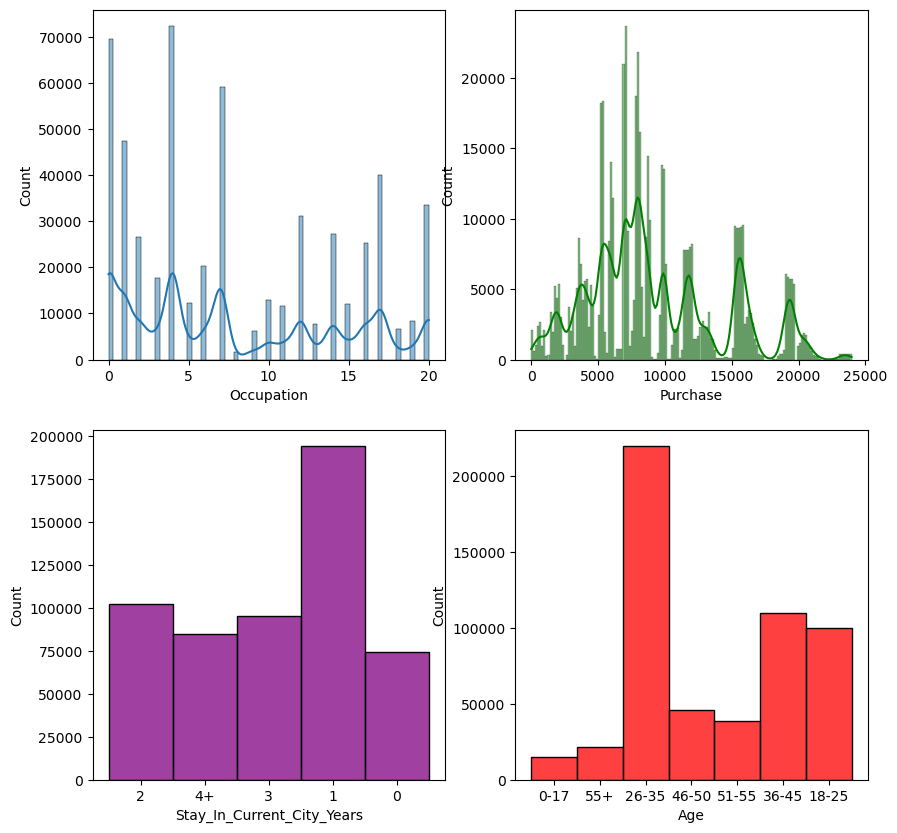

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sn.histplot(walmart_df['Occupation'],kde=True) # continous variable
plt.subplot(2,2,2)
sn.histplot(walmart_df['Purchase'],color='green',kde=True) # continous variable
plt.subplot(2,2,3)
sn.histplot(walmart_df['Stay_In_Current_City_Years'],color='purple')  # continous variable
plt.subplot(2,2,4)
sn.histplot(walmart_df['Age'],color='red')  # continous variable

<Axes: xlabel='Occupation'>

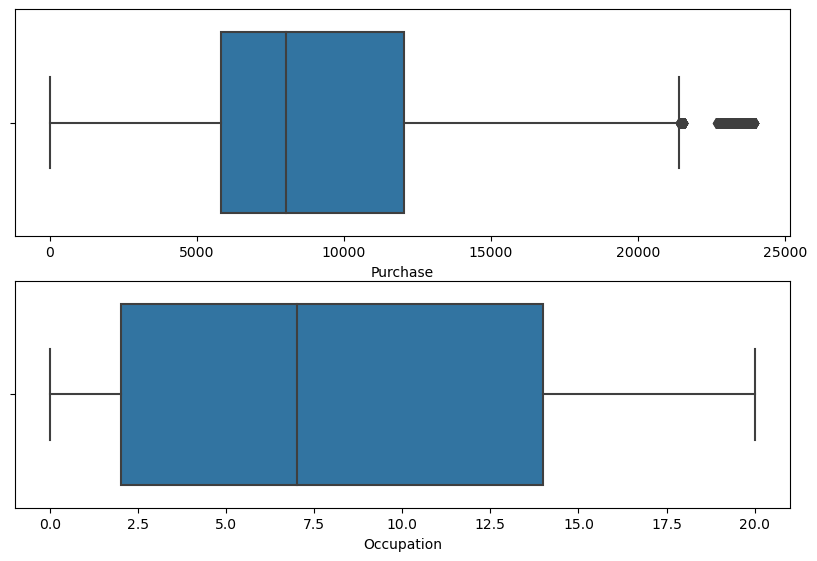

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sn.boxplot(x=walmart_df['Purchase'])
plt.subplot(3,1,2)
sn.boxplot(x=walmart_df['Occupation'])

<div style="color: blue;">


Comments:

No above cases shows a normal distribution.

In case of purchase distribution  the outliers can be identified
    
Distribution of occupation years no outliers in the data

</div>

### Outlier removal

In [19]:
# defining function to remove outliers:here np.clip will replace the outliers with limiting values

def clip_data_between_percentiles(data, lower_percentile, upper_percentile):
    # Calculate the lower and upper percentile values
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)

    # Clip the data between the lower and upper percentile values
    clipped_df = np.clip(data, lower_limit, upper_limit)

    return pd.DataFrame(clipped_df)

In [20]:
# Applying the defined fuction to those continous variables

walmart_df['Purchase']=clip_data_between_percentiles(walmart_df['Purchase'], lower_percentile=5, upper_percentile=95)

<Axes: xlabel='Purchase'>

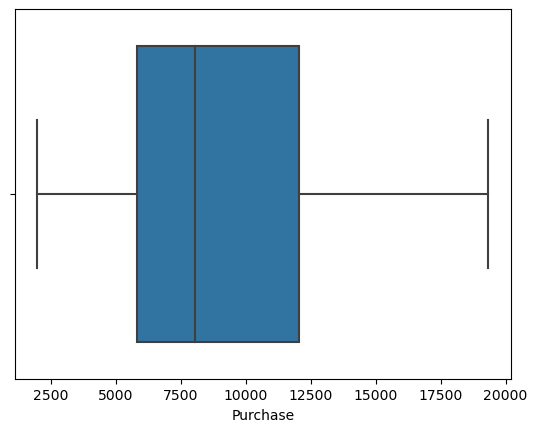

In [21]:
sn.boxplot(x=walmart_df['Purchase'])

### 3. Data Exploration

In [22]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### a. What products are different age groups buying?

In [23]:
cross_tab_1 = pd.crosstab(index=walmart_df['Age'], columns='count')
cross_tab_1

col_0,count
Age,
0-17,15102
18-25,99660
26-35,219587
36-45,110013
46-50,45701
51-55,38501
55+,21504


In [24]:
cross_tab_2 = pd.crosstab(index=walmart_df['Product_Category'], columns=walmart_df['Age'])
cross_tab_2  

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411
2,805,4428,8928,4912,2105,1781,905
3,1200,4710,7662,3854,1376,924,487
4,758,2463,4192,2354,990,678,318
5,4330,28522,61473,29377,11971,9893,5367
6,399,3749,8485,3899,1622,1450,862
7,53,481,1651,809,327,266,134
8,2258,17911,44256,23296,10656,9340,6208
9,16,63,154,107,33,29,8


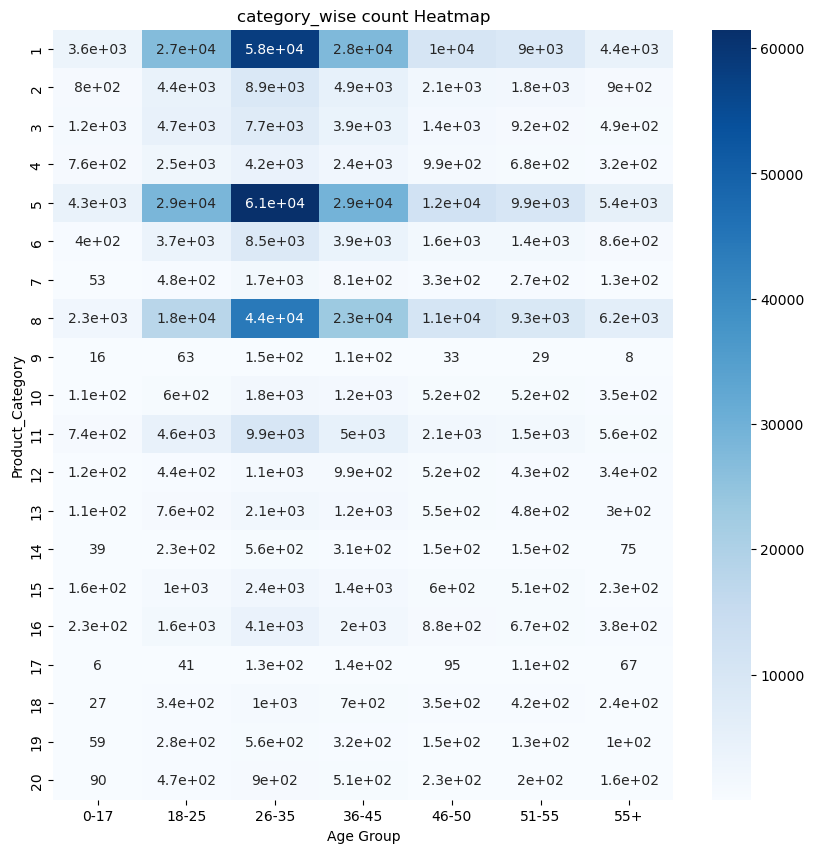

In [25]:
plt.figure(figsize=(10,10))
sn.heatmap(cross_tab_2, annot=True,cmap='Blues')
plt.title('category_wise count Heatmap')
plt.xlabel('Age Group')
plt.ylabel('Product_Category')
plt.show()

<div style="color: blue;">


Comments:
    
26-35 age group people forms the most valuable customers making almost 22k purchases.
    
Among this 26-35 age group Product belonging to categories 1,5 and 8  are the favourites.  
    
Product categories 1,5 and 8 are most bought categories.
    

</div>

#### Is there a relationship between age, marital status, and the amount spent?

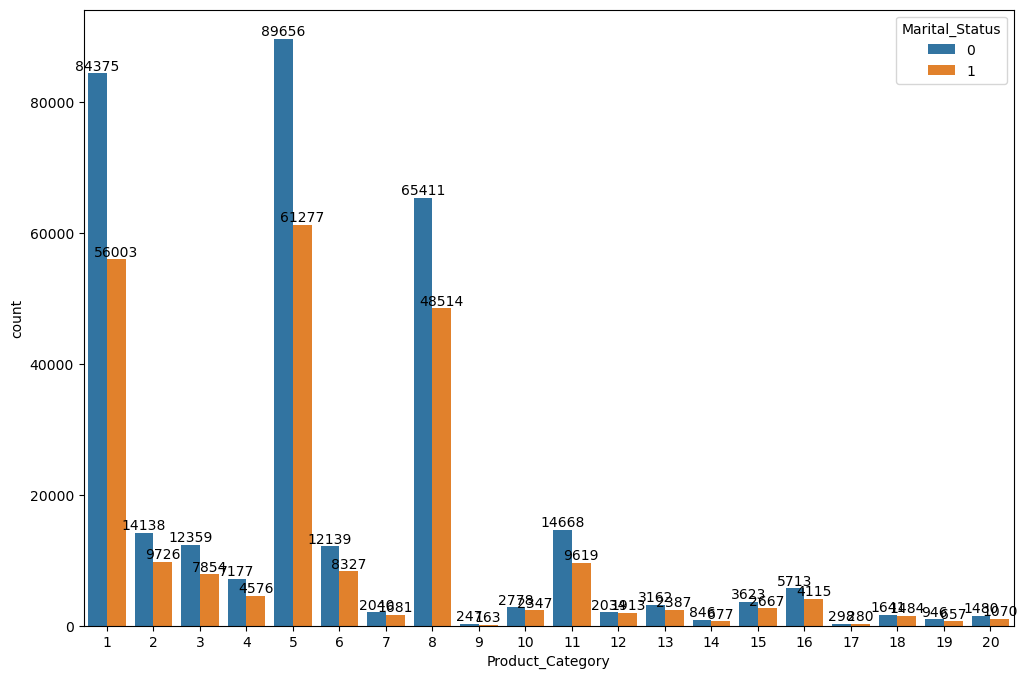

In [26]:
plt.figure(figsize=(12,8))
ax=sn.countplot(x=walmart_df['Product_Category'],hue=walmart_df['Marital_Status'])
for i in ax.containers:
  ax.bar_label(i,)

<div style="color: blue;">


Comments:
    
Generally unmarried people is are greater customers than married.  

</div>

#### Is there a relationship between age, marital status, and the amount spent?

<Axes: xlabel='Age', ylabel='Purchase'>

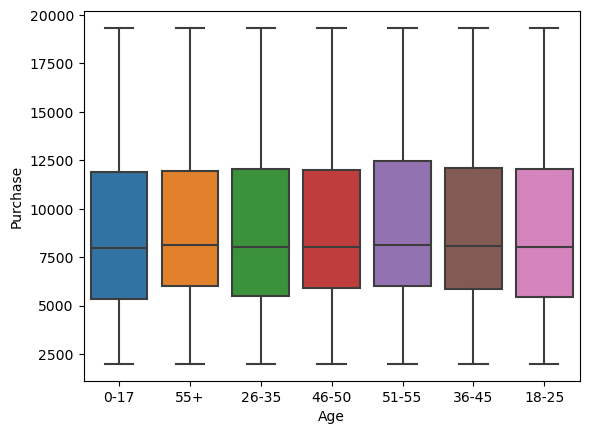

In [27]:
sn.boxplot(x='Age',y='Purchase',data=walmart_df)

<div style="color: blue;">


Comments:
    
Age group are not that correlated with purchasing ability.All age group are showing almost equal purchasing status.
      

</div>

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

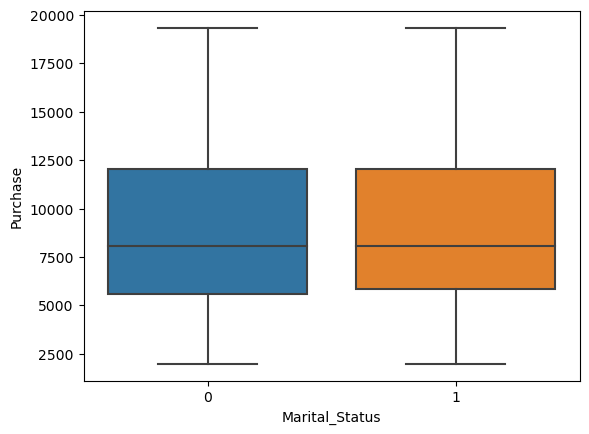

In [28]:
sn.boxplot(x='Marital_Status',y='Purchase',data=walmart_df)

<div style="color: blue;">


Comments:
    
Even though the number of purchases are greater for unmarried people,the amount spent by both married and ummarried group are pretty much similar .This means that married people are making huge amount transactions.
</div>

### Are there preferred product categories for different genders?

In [29]:
gender_partition = pd.crosstab(index=walmart_df['Gender'],columns='count')
gender_partition

col_0,count
Gender,
F,135809
M,414259


<div style="color: blue;">


Comments:
    
Male customers almost forms three times as the female customers.  

</div>

In [30]:
cross_tab_g = pd.crosstab(index=walmart_df['Gender'], columns=walmart_df['Product_Category'])
cross_tab_g

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827


In [31]:
#conditional probability
def category_wise_prob(index_col,category_col):
    cross_tab_2 = pd.crosstab(index=index_col, columns=category_col)
    return cross_tab_2/(cross_tab_2.sum(axis=0))

In [32]:
cross_tab_gp=category_wise_prob(walmart_df['Gender'],walmart_df['Product_Category'])

<Axes: xlabel='Product_Category'>

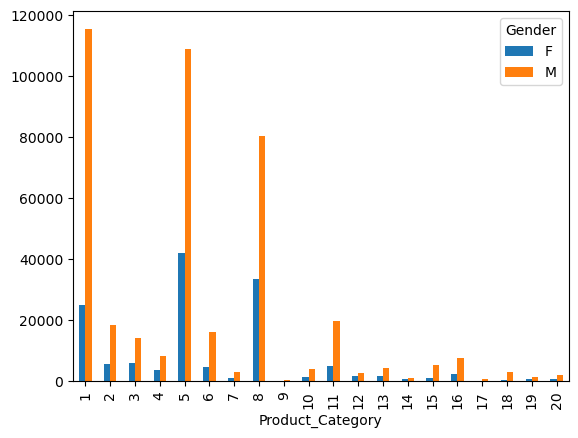

In [33]:
cross_tab_g.T.plot(kind='bar')

<div style="color: blue;">


Comments:
    
Both male and female customers are font off product categories 1,5, and 8. 
      

</div>

<Axes: xlabel='Product_Category'>

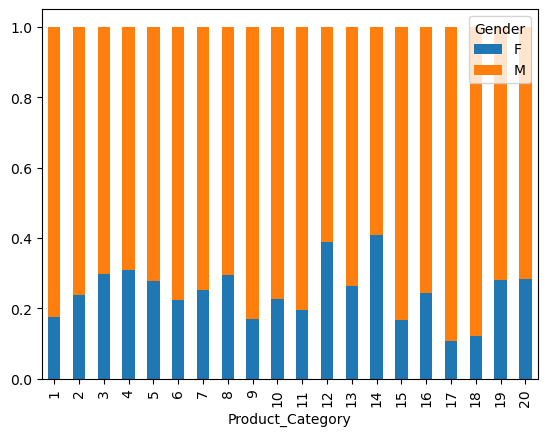

In [34]:
cross_tab_gp.T.plot(kind='bar',stacked=True)

<div style="color: blue;">


Comments:
    
Product belonging to 17 and 18 are least favourite for female customers and 14 and 12 forms the most favourites.
      

</div>

In [35]:
# marginal_probability of each city
cross_tab = pd.crosstab(index=walmart_df['City_Category'], columns='count')
cross_tab

col_0,count
City_Category,
A,147720
B,231173
C,171175


In [36]:
marginal_prob = round(cross_tab / cross_tab.sum()*100,2)
marginal_prob

col_0,count
City_Category,
A,26.85
B,42.03
C,31.12


([<matplotlib.patches.Wedge at 0x16442651750>,
 [Text(0.7313232564949562, 0.8216850336410009, 'A'),
  Text(-1.0901174896653896, 0.14711851931564984, 'B'),
  Text(0.614857442737368, -0.9121131098227152, 'C')],
 [Text(0.39890359445179424, 0.44819183653145495, '26.9%'),
  Text(-0.5946095398174852, 0.08024646508126354, '42.0%'),
  Text(0.3353767869476552, -0.49751624172148096, '31.1%')])

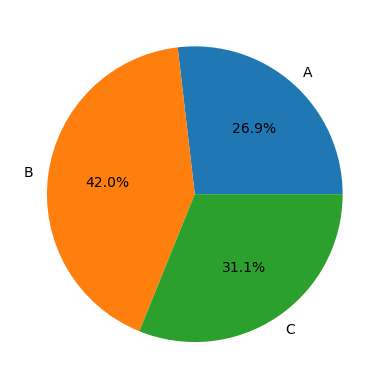

In [37]:
plt.pie(marginal_prob['count'],labels=['A','B','C'],autopct = '%2.1f%%')

<div style="color: blue;">


Comments:
    
Dwellers of city B forms 42% customers,then comes city C forming 31% and A making 29% of walmart customers.  

</div>

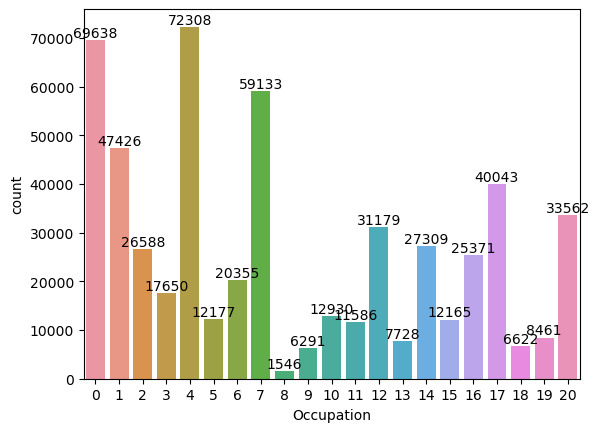

In [38]:
ax=sn.countplot(x=walmart_df['Occupation'])
for i in ax.containers:
  ax.bar_label(i,)

<div style="color: blue;">


Comments:
    
Occupation didnt have a visible correlation with customer purchase ability.But people with  fewer ocupational years have made more number of purchases.There are flaws in this inference. 

</div>

<Axes: xlabel='Product_Category'>

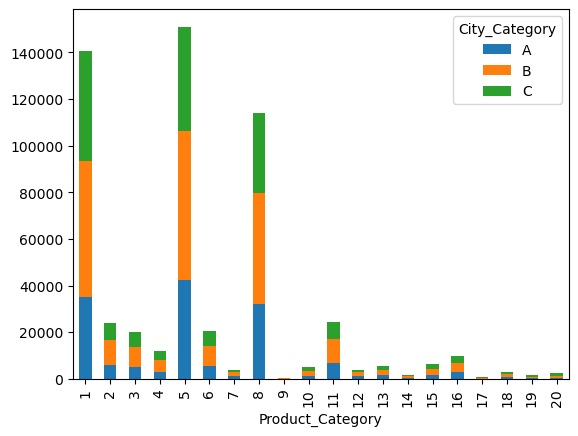

In [39]:
dfo=pd.crosstab( walmart_df['Product_Category'],walmart_df['City_Category'])
dfo.plot(kind='bar', stacked=True)

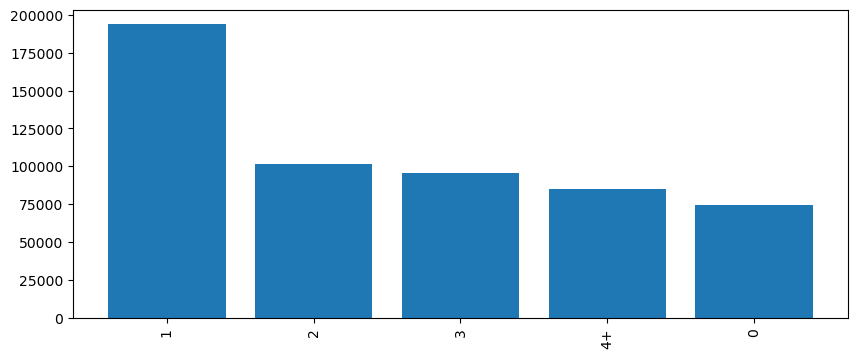

In [40]:
plt.figure(figsize=(10,4))
labels  =walmart_df['Stay_In_Current_City_Years'].value_counts().index
values = walmart_df['Stay_In_Current_City_Years'].value_counts()
plt.bar(labels,values)
plt.xticks(rotation=90,fontsize=10)
plt.show()

<div style="color: blue;">


Comments:
    
Number of years of stay in current city have trend with number of purchases made.Except from customers who have spend less than one year.Purchases made decrease with increase in years stayed in the city.
  

</div>

In [41]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9256.710489
std,1.727592e+03,6.522660,0.491770,3.936211,4855.947166
min,1.000001e+06,0.000000,0.000000,1.000000,1984.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,19336.000000


### Check correlation among different factors using heat maps or pair plots.

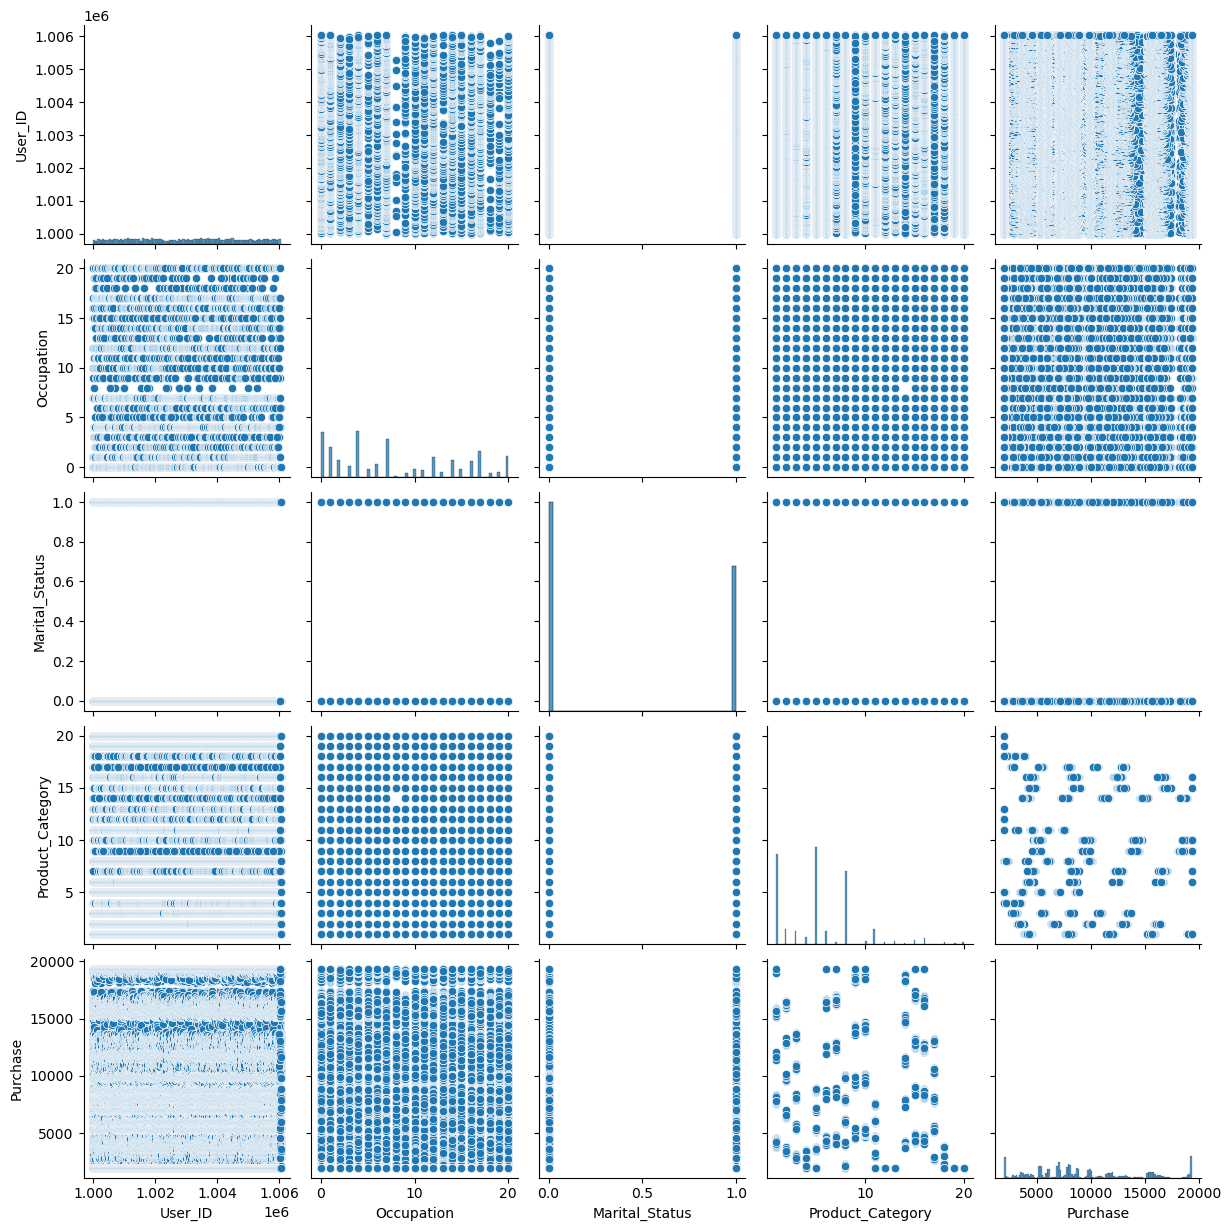

In [42]:
# Check correlation among different factors using pair plots.
sn.pairplot(data=walmart_df)

In [43]:
# Checking the correlation among different factors
walmart_df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_4800\2926392186.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  walmart_df.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004658
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.021220
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000522
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.347437
Purchase,0.004658,0.021220,-0.000522,-0.347437,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_4800\4073552739.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(walmart_df.corr(),annot=True)


<Axes: >

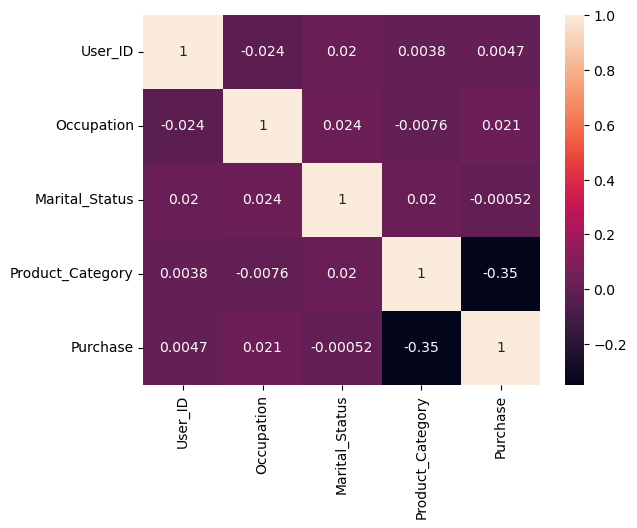

In [44]:
# Check correlation among different factors using heatmap.
sn.heatmap(walmart_df.corr(),annot=True)

<div style="color: blue;">


Comments:
    
Attributes within the dataframe  are least correlated.
  

</div>

### CLT Analysis

#### How does gender affect the amount spent?

In [45]:
purchase_g= walmart_df.groupby('Gender')['Purchase'].mean()
purchase_g

Gender
F    8736.540266
M    9427.240997
Name: Purchase, dtype: float64

In [46]:
cltg_mean_std = walmart_df.groupby('Gender')['Purchase'].agg(['mean', 'std'])
cltg_mean_std

,mean,std
Gender,,
F,8736.540266,4596.984614
M,9427.240997,4925.953492


<div style="color: blue;">


Comments:
    
women spending less money per transaction than men

</div>

In [47]:
# compute the confidence interval for the data available
cltg_mean_std['lower_bound'] = cltg_mean_std['mean'] - norm.ppf(0.975) * (cltg_mean_std['std'] / np.sqrt(len(walmart_df)))
cltg_mean_std['upper_bound'] = cltg_mean_std['mean'] + norm.ppf(0.975) * (cltg_mean_std['std'] / np.sqrt(len(walmart_df)))
cltg_mean_std

,mean,std,lower_bound,upper_bound
Gender,,,,
F,8736.540266,4596.984614,8724.392038,8748.688495
M,9427.240997,4925.953492,9414.223418,9440.258575


<div style="color: blue;">


Comments:

The confidence intervals for the average amount spent by males and females donot overlap.
    
This means the purchasing range of both category is different .Males have higher purchasing amount than female.
   
</div>

In [48]:
# define the function
def confidence_int(df,attribute,percnt):
    cltg_mean_std = df.groupby(attribute)['Purchase'].mean().agg(['mean', 'std'])
    cltg_mean_std['percentage']=percnt
    cltg_mean_std['sample_size']=len(df)
    cltg_mean_std['lower_bound'] = cltg_mean_std['mean'] - norm.ppf(1-(1-percnt)/2) * (cltg_mean_std['std'] / np.sqrt(len(df)))
    cltg_mean_std['upper_bound'] = cltg_mean_std['mean'] + norm.ppf(1-(1-percnt)/2) * (cltg_mean_std['std'] / np.sqrt(len(df)))
    return pd.DataFrame(cltg_mean_std).reset_index()

In [49]:
df_s1=walmart_df.sample(300)

In [50]:
sg1=confidence_int(df_s1,'Gender',0.99).merge(confidence_int(df_s1,'Gender',0.95),how='left',on='index',).merge(confidence_int(df_s1,'Gender',0.90),how='left',on='index')

In [51]:
df_s2=walmart_df.sample(3000)
confidence_int(df_s2,'Gender',0.99).merge(confidence_int(df_s2,'Gender',0.95),how='left',on='index').merge(confidence_int(df_s2,'Gender',0.90),how='left',on='index')

,index,Purchase_x,Purchase_y,Purchase
0,mean,9178.841543,9178.841543,9178.841543
1,std,367.873157,367.873157,367.873157
2,percentage,0.990000,0.950000,0.900000
3,sample_size,3000.000000,3000.000000,3000.000000
4,lower_bound,9161.541206,9165.677613,9167.794024
5,upper_bound,9196.141879,9192.005472,9189.889061


In [52]:
df_s3=walmart_df.sample(30000)
confidence_int(df_s3,'Gender',0.99).merge(confidence_int(df_s3,'Gender',0.95),how='left',on='index').merge(confidence_int(df_s3,'Gender',0.90),how='left',on='index')

,index,Purchase_x,Purchase_y,Purchase
0,mean,9050.773246,9050.773246,9050.773246
1,std,522.606617,522.606617,522.606617
2,percentage,0.990000,0.950000,0.900000
3,sample_size,30000.000000,30000.000000,30000.000000
4,lower_bound,9043.001271,9044.859504,9045.810277
5,upper_bound,9058.545220,9056.686988,9055.736214


#### How does Marital_Status affect the amount spent?

In [53]:
purchase_m= walmart_df['Purchase'].mean()
purchase_m

9256.71048852142

In [54]:
cltm_mean_std = walmart_df.groupby('Marital_Status')['Purchase'].agg(['mean', 'std'])
cltm_mean_std

,mean,std
Marital_Status,,
0,9258.820464,4864.581471
1,9253.669823,4843.486447


In [55]:
# compute the confidence interval for the data available
cltm_mean_std['lower_bound'] = cltm_mean_std['mean'] - norm.ppf(0.975) * (cltm_mean_std['std'] / np.sqrt(len(walmart_df)))
cltm_mean_std['upper_bound'] = cltm_mean_std['mean'] + norm.ppf(0.975) * (cltm_mean_std['std'] / np.sqrt(len(walmart_df)))
cltm_mean_std

,mean,std,lower_bound,upper_bound
Marital_Status,,,,
0,9258.820464,4864.581471,9245.965070,9271.675857
1,9253.669823,4843.486447,9240.870177,9266.469470


<div style="color: blue;">


Comments:

The confidence intervals for the average amount spent by married and unmarried overlap.There is not much distinction in the purchasing amount based on whether the customer is married or not.
   
</div>

In [56]:
df_m1=walmart_df.sample(300)

In [57]:
confidence_int(df_m1,'Marital_Status',0.99).merge(confidence_int(df_m1,'Marital_Status',0.95),how='left',on='index').merge(confidence_int(df_m1,'Marital_Status',0.90),how='left',on='index')

,index,Purchase_x,Purchase_y,Purchase
0,mean,9383.475893,9383.475893,9383.475893
1,std,23.671662,23.671662,23.671662
2,percentage,0.990000,0.950000,0.900000
3,sample_size,300.000000,300.000000,300.000000
4,lower_bound,9379.955548,9380.797241,9381.227898
5,upper_bound,9386.996238,9386.154544,9385.723888


In [58]:
df_m2=walmart_df.sample(3000)

In [59]:
confidence_int(df_m2,'Marital_Status',0.99).merge(confidence_int(df_m2,'Marital_Status',0.95),how='left',on='index').merge(confidence_int(df_m2,'Marital_Status',0.90),how='left',on='index')

,index,Purchase_x,Purchase_y,Purchase
0,mean,9143.627483,9143.627483,9143.627483
1,std,74.942338,74.942338,74.942338
2,percentage,0.990000,0.950000,0.900000
3,sample_size,3000.000000,3000.000000,3000.000000
4,lower_bound,9140.103095,9140.945755,9141.376906
5,upper_bound,9147.151871,9146.309211,9145.878060


In [60]:
df_m3=walmart_df.sample(30000)

In [61]:
confidence_int(df_m3,'Marital_Status',0.99).merge(confidence_int(df_m3,'Marital_Status',0.95),how='left',on='index').merge(confidence_int(df_m3,'Marital_Status',0.90),how='left',on='index')

,index,Purchase_x,Purchase_y,Purchase
0,mean,9307.416190,9307.416190,9307.416190
1,std,21.506330,21.506330,21.506330
2,percentage,0.990000,0.950000,0.900000
3,sample_size,30000.000000,30000.000000,30000.000000
4,lower_bound,9307.096358,9307.172828,9307.211954
5,upper_bound,9307.736023,9307.659553,9307.620427


#### How does Age affect the amount spent?

In [62]:
purchase_m= walmart_df['Purchase'].mean()
purchase_m

9256.71048852142

In [63]:
clta_mean_std = walmart_df.groupby('Age')['Purchase'].agg(['mean', 'std'])
clta_mean_std

,mean,std
Age,,
0-17,8940.649053,4940.597254
18-25,9169.010977,4889.430684
26-35,9243.780119,4855.192053
36-45,9322.921909,4847.597842
46-50,9204.211483,4785.942157
51-55,9514.863250,4873.629668
55+,9327.796549,4779.935889


In [64]:
# compute the confidence interval for the data available
clta_mean_std['lower_bound'] = clta_mean_std['mean'] - norm.ppf(0.975) * (clta_mean_std['std'] / np.sqrt(len(walmart_df)))
clta_mean_std['upper_bound'] = clta_mean_std['mean'] + norm.ppf(0.975) * (clta_mean_std['std'] / np.sqrt(len(walmart_df)))
clta_mean_std

,mean,std,lower_bound,upper_bound
Age,,,,
0-17,8940.649053,4940.597254,8927.592776,8953.705330
18-25,9169.010977,4889.430684,9156.089916,9181.932039
26-35,9243.780119,4855.192053,9230.949538,9256.610700
36-45,9322.921909,4847.597842,9310.111397,9335.732421
46-50,9204.211483,4785.942157,9191.563906,9216.859061
51-55,9514.863250,4873.629668,9501.983945,9527.742555
55+,9327.796549,4779.935889,9315.164845,9340.428254


<div style="color: blue;">


Comments:

The confidence intervals for the average amount spent by different age groups overlap for certain groups like confidence interval of 36-45 and 55+ age groups overlap.
   
</div>

In [65]:
df_a1=walmart_df.sample(300)

In [66]:
confidence_int(df_a1,'Age',0.99).merge(confidence_int(df_a1,'Age',0.95),how='left',on='index').merge(confidence_int(df_a1,'Age',0.90),how='left',on='index')

,index,Purchase_x,Purchase_y,Purchase
0,mean,9255.018089,9255.018089,9255.018089
1,std,1128.266754,1128.266754,1128.266754
2,percentage,0.990000,0.950000,0.900000
3,sample_size,300.000000,300.000000,300.000000
4,lower_bound,9087.227251,9127.345033,9147.871483
5,upper_bound,9422.808927,9382.691145,9362.164696


In [67]:
df_a2=walmart_df.sample(3000)

In [68]:
confidence_int(df_a2,'Age',0.99).merge(confidence_int(df_a2,'Age',0.95),how='left',on='index').merge(confidence_int(df_a2,'Age',0.90),how='left',on='index')

,index,Purchase_x,Purchase_y,Purchase
0,mean,9327.843156,9327.843156,9327.843156
1,std,289.978189,289.978189,289.978189
2,percentage,0.990000,0.950000,0.900000
3,sample_size,3000.000000,3000.000000,3000.000000
4,lower_bound,9314.206064,9317.466611,9319.134885
5,upper_bound,9341.480249,9338.219702,9336.551428


In [69]:
df_a3=walmart_df.sample(30000)

In [70]:
confidence_int(df_a3,'Age',0.99).merge(confidence_int(df_a3,'Age',0.95),how='left',on='index').merge(confidence_int(df_a3,'Age',0.90),how='left',on='index')

,index,Purchase_x,Purchase_y,Purchase
0,mean,9243.440731,9243.440731,9243.440731
1,std,241.633393,241.633393,241.633393
2,percentage,0.990000,0.950000,0.900000
3,sample_size,30000.000000,30000.000000,30000.000000
4,lower_bound,9239.847266,9240.706442,9241.146043
5,upper_bound,9247.034196,9246.175020,9245.735418


<div style="color: blue;">


Comments:
    
The confidence interval computed using the entire dataset wider for one of the genders i.e. confidence interval for male is slightly larger than female this is because of the distribution of male customers is greater than female.
    
Confidence interval varies with variation in the sample size.As the sample size increases confidence interval also decreases.

Confidence interval for different sample sizes may or may not overlap.It depend on the random sample that we selected.
    
As the sample size increases the sample mean approches the populatio mean.

</div>